In [1]:
#coding=utf-8
#python2
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import *
mpl.rcParams['font.sans-serif']=['FangSong']
pd.set_option('display.width', 320)
pd.set_option('display.max_colwidth', -1)
pd.set_option('float_format','{:20,.2f}'.format)
from os import listdir
for d in listdir("."):
    print d.decode("gbk")

.idea
.ipynb_checkpoints
change2.csv
choose_model.ipynb
feature_sd.csv
jupyter27_x64.bat
modelR.py
phone_dict.pickle


In [2]:
data=pd.read_csv("feature_sd.csv",encoding="utf-8")
data.set_index("user",inplace=True)
print(data.shape)
data.head()

(1000000, 621)


,is_buy,b_0,b_1,b_10,b_100,b_101,b_102,b_103,b_104,b_105,...,p_18,p_19,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9
user,,,,,,,,,,,,,,,,,,,,,
13356614239,0,0,0,0,0,0,0,1,0,0,...,1,2,1,1,1,1,1,1,1,1
18006398880,1,0,0,0,0,0,0,0,0,0,...,0,0,3,3,3,3,3,3,0,0
15376012176,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15318795806,1,0,0,0,0,0,0,0,0,0,...,4,4,3,3,3,3,3,3,3,3
18963025304,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y=data["is_buy"]
X=data.drop("is_buy",axis=1)
X.head()

,b_0,b_1,b_10,b_100,b_101,b_102,b_103,b_104,b_105,b_106,...,p_18,p_19,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9
user,,,,,,,,,,,,,,,,,,,,,
13356614239,0,0,0,0,0,0,1,0,0,0,...,1,2,1,1,1,1,1,1,1,1
18006398880,0,0,0,0,0,0,0,0,0,0,...,0,0,3,3,3,3,3,3,0,0
15376012176,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15318795806,0,0,0,0,0,0,0,0,0,0,...,4,4,3,3,3,3,3,3,3,3
18963025304,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Ridge

In [20]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
predict_con=model.predict(X_test)

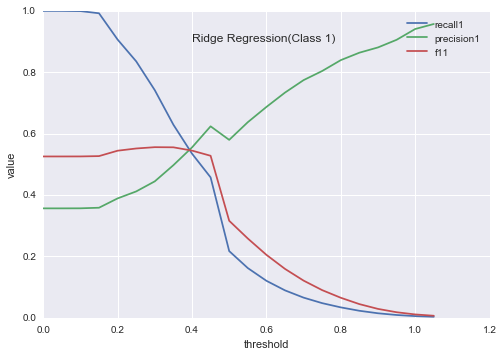

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
ts,rs,ps,f1s=[],[],[],[]
for t in np.arange(0,1.1,0.05):
    threshold=t
    predict=[1 if p>threshold else 0 for p in predict_con]
#     print accuracy_score(y_test,predict)
    cm=confusion_matrix(y_test,predict,labels=[0,1])
#     print cm
    recall1=float(cm[1][1])/(cm[1][0]+cm[1][1])
    precision1=float(cm[1][1])/(cm[0][1]+cm[1][1])
    f11=2*recall1*precision1/(recall1+precision1)
#     print threshold,recall1,precision1,f11
    ts.append(threshold)
    rs.append(recall1)
    ps.append(precision1)
    f1s.append(f11)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.plot(ts,rs,label="recall1")
plt.plot(ts,ps,label="precision1")
plt.plot(ts,f1s,label="f11")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("value")
plt.text(0.4,0.9,"Ridge Regression(Class 1)")
plt.show()

# Lasso

In [76]:
from sklearn.linear_model import Lasso
model=Lasso(0.1)
model.fit(X_train,y_train)
predict_con=model.predict(X_test)

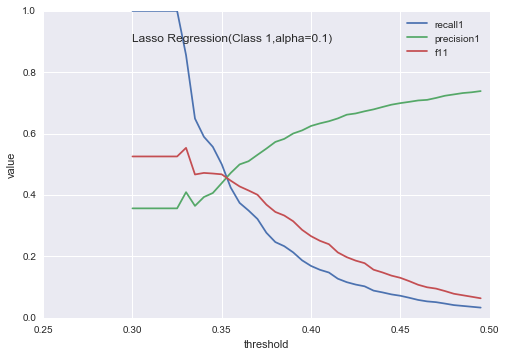

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
ts,rs,ps,f1s=[],[],[],[]
for t in np.arange(0.3,0.5,0.005):
    threshold=t
    predict=[1 if p>threshold else 0 for p in predict_con]
#     print accuracy_score(y_test,predict)
    cm=confusion_matrix(y_test,predict,labels=[0,1])
#     print cm
    recall1=float(cm[1][1])/(cm[1][0]+cm[1][1])
    precision1=float(cm[1][1])/(cm[0][1]+cm[1][1])
    f11=2*recall1*precision1/(recall1+precision1)
#     print threshold,recall1,precision1,f11
    ts.append(threshold)
    rs.append(recall1)
    ps.append(precision1)
    f1s.append(f11)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.plot(ts,rs,label="recall1")
plt.plot(ts,ps,label="precision1")
plt.plot(ts,f1s,label="f11")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("value")
plt.text(0.3,0.9,"Lasso Regression(Class 1,alpha=0.1)")
plt.show()

# ElasticNet

In [90]:
from sklearn.linear_model import ElasticNet
model=ElasticNet(0.1)
model.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
predict_con=model.predict(X_test)

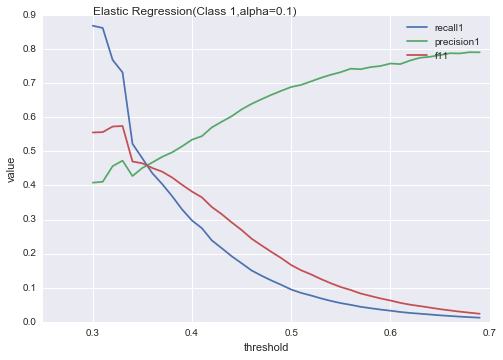

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
ts,rs,ps,f1s=[],[],[],[]
for t in np.arange(0.3,0.7,0.01):
    threshold=t
    predict=[1 if p>threshold else 0 for p in predict_con]
#     print accuracy_score(y_test,predict)
    cm=confusion_matrix(y_test,predict,labels=[0,1])
#     print cm
    recall1=float(cm[1][1])/(cm[1][0]+cm[1][1])
    precision1=float(cm[1][1])/(cm[0][1]+cm[1][1])
    f11=2*recall1*precision1/(recall1+precision1)
#     print threshold,recall1,precision1,f11
    ts.append(threshold)
    rs.append(recall1)
    ps.append(precision1)
    f1s.append(f11)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.plot(ts,rs,label="recall1")
plt.plot(ts,ps,label="precision1")
plt.plot(ts,f1s,label="f11")
plt.legend()
plt.xlabel("threshold")
plt.ylabel("value")
plt.text(0.3,0.9,"Elastic Regression(Class 1,alpha=0.1)")
plt.show()

# LR

In [95]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
predict_con=model.predict(X_test)

In [101]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[175040  17982]
 [ 82941  24037]]
recall1=0.224691057975,precision1=0.572050738951,f11=0.322650791627


# LDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

C:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [6]:
predict_con=model.predict(X_test)

In [10]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[174960  18407]
 [ 82454  24179]]
recall1=0.226749692872,precision1=0.567768750294,f11=0.324074012023


# Bayesian

In [11]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [12]:
predict_con=model.predict(X_test)

In [15]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[151514  41853]
 [ 66488  40145]]
recall1=0.376478200932,precision1=0.489585111832,f11=0.425645837641


# RF

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=3)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
predict_con=model.predict(X_test)

In [21]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[172156  21211]
 [ 62989  43644]]
recall1=0.409291682687,precision1=0.672947344075,f11=0.509003545438


# RF2

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(n_jobs=3)
model.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
predict_con=model.predict(X_test)

In [26]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[172887  20480]
 [ 63434  43199]]
recall1=0.405118490524,precision1=0.678386909342,f11=0.507292498473


# Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [29]:
predict_con=model.predict(X_test)

In [32]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[172637  20730]
 [ 63416  43217]]
recall1=0.405287293802,precision1=0.675825292821,f11=0.50670653066


# GBRT

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
predict_con=model.predict(X_test)

In [39]:
cm=confusion_matrix(y_test,predict_con,labels=[0,1])
print cm
r1=float(cm[1][1])/(cm[1][0]+cm[1][1])
p1=float(cm[1][1])/(cm[0][1]+cm[1][1])
f11=2*r1*p1/(r1+p1)
print "recall1=%s,precision1=%s,f11=%s"%(r1,p1,f11)

[[179596  13771]
 [ 65391  41242]]
recall1=0.386765822963,precision1=0.74967734899,f11=0.510275540378


# SVM

In [ ]:
from sklearn import svm
model=svm.SVC(n_jobs=3)
model.fit(X_train,y_train)

In [ ]:
#on 244

# Neural network

In [6]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(X_train,y_train)

ImportError: cannot import name MLPClassifier